In [1]:
from SES_setup import *
import time
from heatmap_setup import calculate_steadystate, heat_map_calculator


dirname = 'SES_heatmap_excvN'

# Calculating

In [ ]:
method = 'eigen'
#method = 'power'
#x_values=[6][::-1] # N
x_values=[5,6,7,8,9,10,11][::-1] # N
#x_values=[3,4,5,6,7][::-1] # N

w_2 = 8000.
alpha = 50./pi

pap = alpha_to_pialpha_prop(alpha, w_2)
wc = 100.
w_0 = 200.
Gamma = (w_0**2)/wc
PARAMS = PARAMS_setup(bias=100., w_2=8000., V = 100., pialpha_prop=pap,
                                T_EM=6000., T_ph =300.,
                                alpha_EM=0.1, shift=True,
                                num_cpus=3, N=3, Gamma=Gamma, w_0=w_0,
                                silent=True, exc_diff=0)
exc = PARAMS['exc']

 # N
y_values=[5,4,3,2,1,0] # exc
#y_values=[3,2, 1] # exc_diff (exc = 2n-exc_diff)
"""try:
    if 'iterative' in method:
        print("Using fill-factor of {}".format(ff))
"""
ss_array, info_array= heat_map_calculator(PARAMS,
                        x_axis_parameters=['N_1', 'N_2'],
                        y_axis_parameters=['exc_diff'],
                        x_values=x_values,
                        y_values=y_values,
                        dir_name='SES_heatmap_excvN',
                        fill_factor=None, save_data=True, 
                        persistent=False, method=method, threshold=1e-7)

The operators took 601.303939104 and have dimension 345.
Building the RC Liouvillian took 601.324 seconds.
****************************************************************
It is 119025by119025. The full basis would be 131769by131769
It took  57.8980259895  seconds to build the Non-secular RWA Liouvillian
N_1 = 11, N_2 = 11, exc= 17


# Plotting

In [2]:
import matplotlib.pyplot as plt

def steadystate_observable(ss_array, PARAMS, observable):
    try:
        size = (len(PARAMS['y_values']), len(PARAMS['x_values']))
    except KeyError:
        size = (1,1)
    # deal with the case where N is being changed as an x value
    if 'N_1' in PARAMS['x_axis_parameters']:
        data_array = np.zeros(size)         # Collect data
        N_values = PARAMS['x_values']
        # NEw observable operator for each N value
        for i, N in enumerate(N_values):
            PARAMS.update({'N_1' : N, 'N_2' : N})
            exc = (2*N)-PARAMS['exc_diff']
            print (N, exc, PARAMS['exc_diff'])
            # Leave it so exc can be fixed or a y_parameter
            if 'exc' in PARAMS['x_axis_parameters']:
                PARAMS.update({'exc': exc})
            _obs_op = make_expectation_operators(PARAMS)[observable]
            for j, y in enumerate(PARAMS['y_values']):
                # the case where exc is on the y axis
                if 'exc_diff' in PARAMS['y_axis_parameters']:
                    PARAMS.update({'exc': (2*N)-y})
                    _obs_op = make_expectation_operators(PARAMS)[observable]
                try:
                    print ss_array[j][i].shape, _obs_op.shape
                    data_array[j][i] = (qt.Qobj(ss_array[j][i])*_obs_op).tr().real
                except AttributeError:
                    data_array[j][i] = np.nan
        return data_array
    else:
        # Much simpler if N isn't on the x-axis
        obs_op = make_expectation_operators(PARAMS)[observable]
        f = lambda x: (qt.Qobj(x)*obs_op).tr()
        ss_array = np.reshape(ss_array, (1, size[0]*size[1]))[0]

        data_array = map(f, ss_array)
        data_array = np.array(data_array).reshape(size).real
        return data_array


def heatmap_plotter(num, plot_SD=True, dir_name="heatmap", 
                     print_params=False, observable='sigma_x', 
                    reverse_x=True):
    
    directory = 'DATA/'+dir_name+'_'+str(num)
    ss_array = load_obj(directory+'/ss_array')
    PARAMS = load_obj(directory+'/PARAMS')
    info_array = load_obj(directory+'/info_array') # reverse ordering -> lower_N-higher_N
    info = info_array[0][0]
    
    try:
        # To catch an old bug where these were in "info" not in PARAMS
        keys = ['x_values', 'y_values', 'y_axis_parameters', 'x_axis_parameters']
        PARAMS.update(dict((key, info[key]) for key in keys))
    except Exception as err:
        print "new style"
    if plot_SD:
        plot_UD_SD(PARAMS["Gamma_1"], PARAMS["alpha_1"], PARAMS["w0_1"], eps=2000.)
    
    ss_array = steadystate_observable(ss_array, PARAMS, observable)

    
    f, axes = plt.subplots(1,1, figsize=(13,6))
    for i, y_val in enumerate(PARAMS['y_values']):
        x_values = PARAMS['x_values']
        if reverse_x:
            x_values = x_values[::-1]
        axes.plot(x_values, ss_array[i], 
                  label=str(PARAMS['y_axis_parameters'])+"="+str(y_val))
    
    print_PARAMS(PARAMS)
    
    plt.xlabel(', '.join(PARAMS['x_axis_parameters']))
    plt.ylabel("Steadystate "+observable)
    #plt.ylabel(', '.join(info['y_axis_parameters']))
    plt.legend()
    plt.grid()
    plot_filename = 'PLOTS/'+dir_name+'_'+str(num)+'.pdf'
    plt.savefig(plot_filename)
    print "saved at {}".format(plot_filename)
    plt.show()

new style


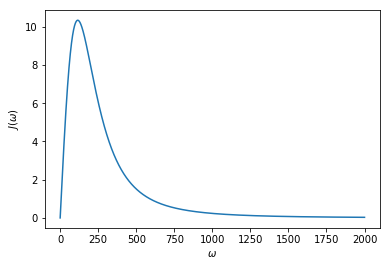

(7, 13, 1)
(144, 144) (144, 144)
(147, 147) (147, 147)
(147, 147) (147, 147)
(6, 11, 1)
(105, 105) (105, 105)
(108, 108) (108, 108)
(108, 108) (108, 108)
(5, 9, 1)
(72, 72) (72, 72)
(75, 75) (75, 75)
(75, 75) (75, 75)
(4, 7, 1)
(45, 45) (45, 45)
(48, 48) (48, 48)
(48, 48) (48, 48)
(3, 5, 1)
(24, 24) (24, 24)
(27, 27) (27, 27)
(27, 27) (27, 27)
kappa_2=70.71, kappa_1=70.71, T_EM=6000.00, bias=100.00, alpha_2=15.92, alpha_1=15.92, T_2=300.00, T_1=300.00, Gamma_1=400.00, Gamma_2=400.00, shift2=25.00, w_1=8100.00, w0_1=200.00, w0_2=200.00, V=100.00, w_2=8000.00, dipole_2=1.00, dipole_1=1.00, exc=5.00, alpha_EM=0.10, sys_dim=3.00, mu=0.99, shift1=25.00, w_xx=16100.00, gamma_1=0.32, gamma_2=0.32
saved at PLOTS/SES_heatmap_excvN_1.pdf


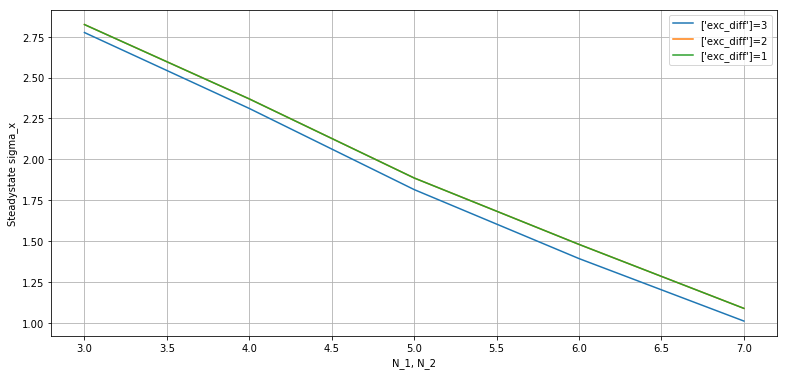

In [3]:
heatmap_plotter(1, plot_SD=True, dir_name=dirname, 
                     print_params=False, observable='sigma_x', 
                    reverse_x=True)